In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu,binom_test
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("breast_cancer.csv")

About Dataset

Description:

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

Acknowledgements:
This dataset has been referred from Kaggle.

[link](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Text(0.5, 1.0, 'Correlation Heatmap')

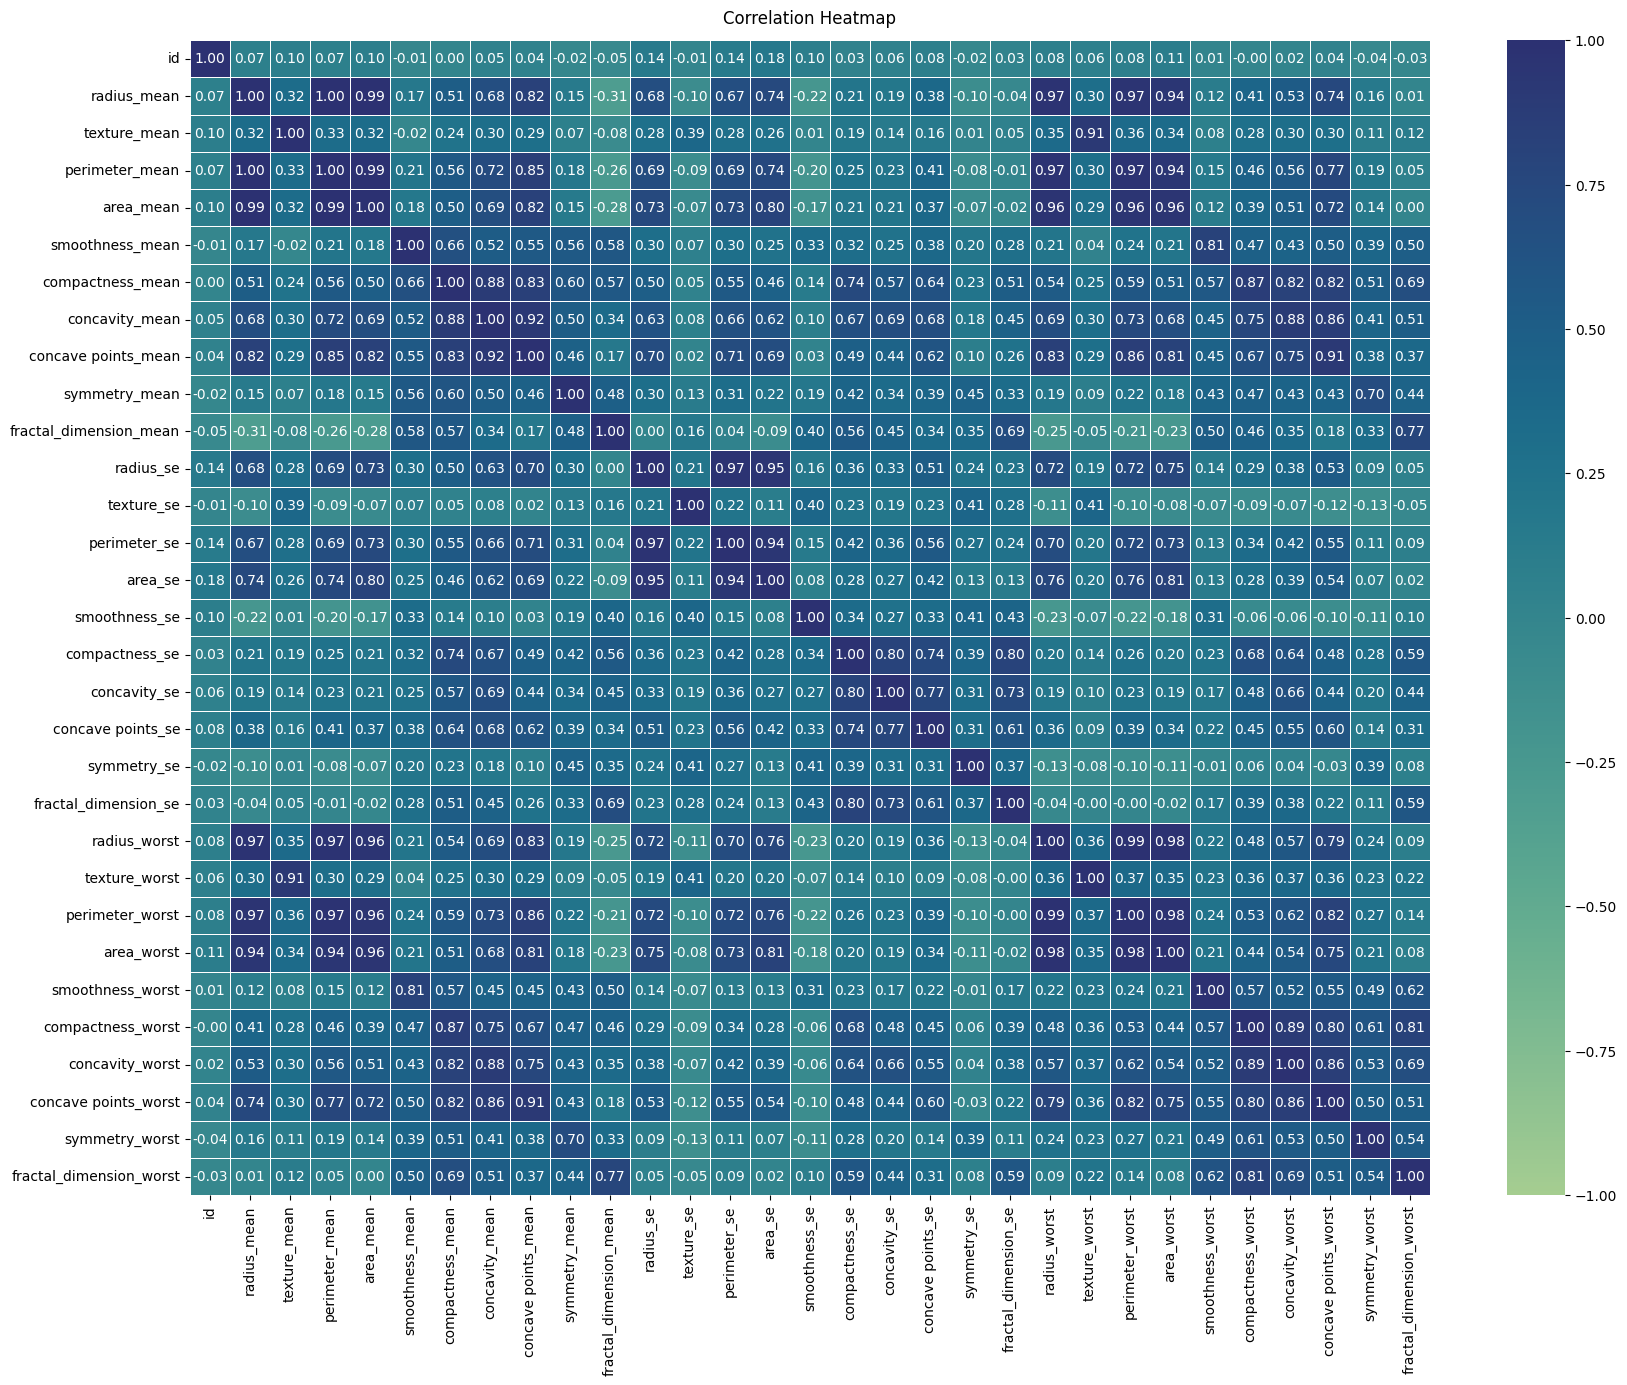

In [6]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

We would be opting for 2 coloums of this data set for our expriment.(One with average correlation)


In [11]:
exp_df=df[['concavity_mean','radius_mean']]

In [13]:
exp_df.describe()

,concavity_mean,radius_mean
count,569.000000,569.000000
mean,0.088799,14.127292
std,0.079720,3.524049
min,0.000000,6.981000
25%,0.029560,11.700000
50%,0.061540,13.370000
75%,0.130700,15.780000
max,0.426800,28.110000


In [52]:
corr, _ = kendalltau(exp_df['concavity_mean'], exp_df['radius_mean'])
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: 0.46509


<Axes: ylabel='Density'>

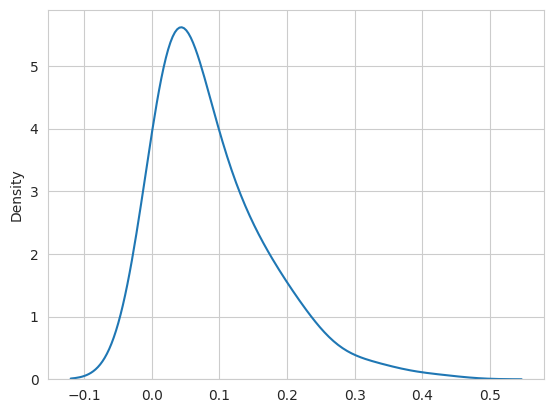

In [32]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(exp_df['concavity_mean']), bw=0.5)

<Axes: ylabel='Density'>

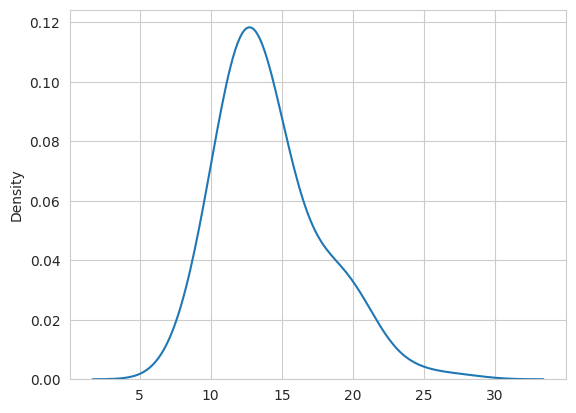

In [33]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(exp_df['radius_mean']), bw=0.5)

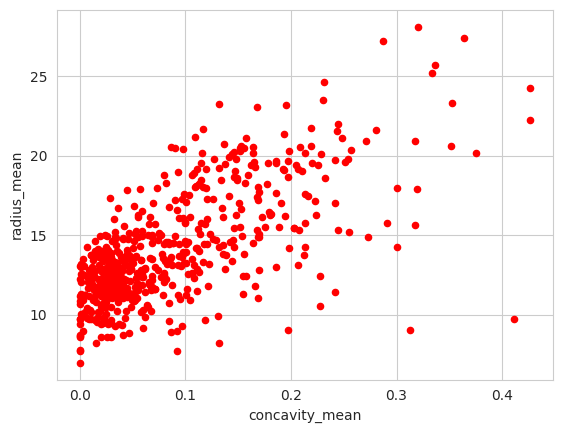

In [38]:
ax1=exp_df.plot(kind='scatter', x='concavity_mean', y='radius_mean', color='r')

In [29]:
shapiro(exp_df["concavity_mean"])


ShapiroResult(statistic=0.8668311834335327, pvalue=1.3386320802392117e-21)

In [30]:
shapiro(exp_df["radius_mean"])


ShapiroResult(statistic=0.9410693645477295, pvalue=3.105940390947179e-14)

In [28]:
stats.wilcoxon(exp_df["concavity_mean"],exp_df['radius_mean'] )

WilcoxonResult(statistic=0.0, pvalue=6.866066916496567e-95)

In [40]:
binom_test((exp_df['concavity_mean'] > exp_df['radius_mean']).sum(), len(exp_df), p=0.5)

1.035052700659762e-171

In [45]:
mannwhitneyu(exp_df['concavity_mean'], exp_df['radius_mean'], alternative='two-sided')


MannwhitneyuResult(statistic=0.0, pvalue=1.8378526994483025e-187)

In [46]:
mean_of_col=np.mean(exp_df['concavity_mean']) - np.mean(exp_df['radius_mean'])
mean_of_col

-14.03849242407733

In [47]:
num_of_per=1000
zerovector=np.zeros(num_of_per)

Here is the function to perform the permutation test for our data


In [50]:
for i in range(num_of_per):

    shuffled = np.concatenate([exp_df['concavity_mean'], exp_df['radius_mean']])
    np.random.shuffle(shuffled)

    group1 = shuffled[:300]
    group2 = shuffled[300:]
    permuted_statistic = np.mean(group1) - np.mean(group2)

    zerovector[i] = permuted_statistic


In [51]:
p_value_permutation = (np.abs(zerovector) >= np.abs(mean_of_col)).mean()
print("Observed Test Statistic:", mean_of_col)

Observed Test Statistic: -14.03849242407733
